Importar Librerías

In [ ]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Cargar conjunto de datos , Normalización y Construcción modelo

In [ ]:
# Cargar el dataset de cifar 10
cifar_10 = keras.datasets.cifar10
# Cargue la divisidn de entrenamiento y prueba del conjunto de datos cifar 10
(training_images, training_labels), (test_images, test_labels) = cifar_10.load_data()

# Normalizar los valores de pixeles del tren y probar las imagenes.
training_images = training_images / 255.0
test_images = test_images / 255.0

# Construir el modelo de clasificacion.
model = keras.models. Sequential ([
    # Agregar convoluciones y max pooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),
    # Agrega las mismas capas que antes.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])


model.summary()

170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914

Compilación del modelo

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Entrenamiento del modelo

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4538 - accuracy: 0.4850
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1674 - accuracy: 0.5914
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0541 - accuracy: 0.6324
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9779 - accuracy: 0.6570
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9096 - accuracy: 0.6834
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8506 - accuracy: 0.7013
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7974 - accuracy: 0.7218
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7450 - accuracy: 0.7389
Epoch 9/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6974 - accuracy: 0.7544
Epoch 10/10
1563/1563 [==============================] - 54s 34m

<Axes: >

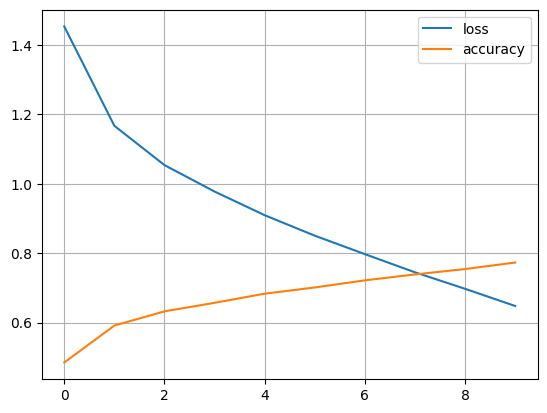

In [ ]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)
# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

Evaluación del modelo

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print ("Precisión en el conjunto de prueba:", accuracy)

1563/1563 [==============================] - 16s 10ms/step - loss: 0.6140 - accuracy: 0.7895
Pérdida en el conjunto de entrenamiento: 0.6139601469039917
Precisión en el conjunto de entrenamiento: 0.7895399928092957
313/313 [==============================] - 3s 10ms/step - loss: 1.1568 - accuracy: 0.6167
Pérdida en el conjunto de prueba: 1.156795620918274
Precisión en el conjunto de prueba: 0.6166999936103821


Predicción

In [ ]:
#predict

index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: [8]
1/1 [==============================] - 0s 221ms/step
Classification:
 [[2.5261485e-03]
 [5.0499849e-02]
 [4.2382311e-07]
 [1.8615311e-06]
 [2.1672442e-07]
 [6.8029050e-07]
 [1.3948293e-09]
 [4.8833550e-07]
 [9.4656932e-01]
 [4.0102896e-04]]


Preparación de datos

In [ ]:
print(test_labels[:30])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]
 [2]
 [4]
 [0]
 [9]
 [6]]


Selección Imágenes de Interes

In [ ]:
FIRST_IMAGE=8
SECOND_IMAGE=5
THIRD_IMAGE=14
print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[ THIRD_IMAGE])

[3]
[6]
[9]


Visualización de Imágenes

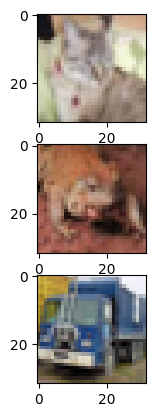

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [ ]:
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

Visualización de Convoluciones

1/1 [==============================] - 0s 35ms/step


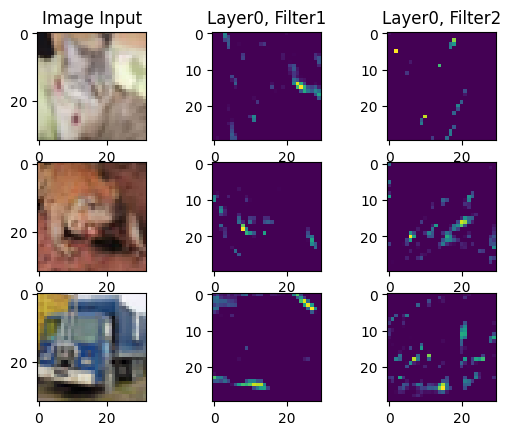

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])

Selección Imágenes de Interés

In [ ]:
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=18
print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[ THIRD_IMAGE])

[3]
[6]
[8]


Visualización de Imágenes

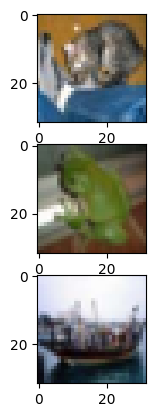

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

Extracción de activaciones

In [ ]:
layer = 0
filter1 = 0
filter2 = 10
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

Visualización Convoluciones

1/1 [==============================] - 0s 152ms/step


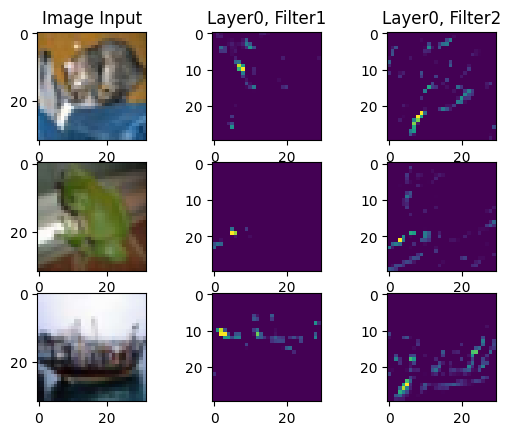

In [ ]:
f, axarr = plt.subplots(3,3)
axarr[0, 0].set_title("Image Input")
axarr[0,0]. imshow(test_images[FIRST_IMAGE])

f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) +", Filter1")
axarr[0,1].imshow(f1[0, : , :, filter1])
axarr[0,2].set_title("Layer"+ str(layer) +", Filter2")
axarr[0,2].imshow(f1[0, : , :, filter2])
axarr[1,0].imshow(test_images[SECOND_IMAGE])

f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[1,1].imshow(f2[0, : , :, filter1])
axarr[1,2]. imshow(f2[0, : , :, filter2])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 3))[layer]
axarr[2,1].imshow(f3[0, : , :, filter1])
axarr[2,2].imshow(f3[0, : , :, filter2])